# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#  convolutional layer

## Data Preprocessing

### Training Image preprocessing

In [27]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train_with_samples',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18345 files belonging to 10 classes.


### Validation Image Preprocessing

In [29]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid_with_samples',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18345 files belonging to 10 classes.


## Building Model

In [30]:
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.models import Sequential

cnn = Sequential()

### Building Convolution Layer

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [37]:
cnn.add(tf.keras.layers.Flatten())

In [38]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [39]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [40]:
#Output Layer
# add how many classes to units
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

### Compiling and Training Phase

In [41]:
# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [42]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          15,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 635s 1s/step - accuracy: 0.3595 - loss: 1.8208 - val_accuracy: 0.7319 - val_loss: 0.7467
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 503s 877ms/step - accuracy: 0.7582 - loss: 0.6801 - val_accuracy: 0.8513 - val_loss: 0.4283
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 519s 904ms/step - accuracy: 0.8633 - loss: 0.4046 - val_accuracy: 0.9217 - val_loss: 0.2283
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 513s 894ms/step - accuracy: 0.8951 - loss: 0.2937 - val_accuracy: 0.9489 - val_loss: 0.1478
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 514s 896ms/step - accuracy: 0.9178 - loss: 0.2333 - val_accuracy: 0.9588 - val_loss: 0.1235
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 501s 874ms/step - accuracy: 0.9400 - loss: 0.1766 - val_accuracy: 0.9499 - val_loss: 0.1536
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 511s 890ms/step - accuracy: 0.9550 - loss: 0.1264 - val_accuracy: 0.9690 - val_loss: 0.0951
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 490s 853ms/step - accuracy: 0.9620 - lo

## Evaluating Model

In [44]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

574/574 ━━━━━━━━━━━━━━━━━━━━ 120s 208ms/step - accuracy: 0.9838 - loss: 0.0474
Training accuracy: 0.9859907627105713


In [45]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

574/574 ━━━━━━━━━━━━━━━━━━━━ 104s 181ms/step - accuracy: 0.9862 - loss: 0.0417
Validation accuracy: 0.9859907627105713


### Saving Model

In [47]:
cnn.save('trained_plant_disease_model.keras')

In [48]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5382938385009766,
  0.7902970910072327,
  0.8687925934791565,
  0.9022076725959778,
  0.9271190762519836,
  0.9378577470779419,
  0.9523030519485474,
  0.9611883163452148,
  0.9692014455795288,
  0.9681112170219421],
 'loss': [1.3018193244934082,
  0.5982760787010193,
  0.3820973038673401,
  0.27367866039276123,
  0.21063733100891113,
  0.17789369821548462,
  0.1345440000295639,
  0.11276998370885849,
  0.09273356944322586,
  0.0936984121799469],
 'val_accuracy': [0.731916069984436,
  0.8512946367263794,
  0.9217225313186646,
  0.9488689303398132,
  0.9588443636894226,
  0.9499046206474304,
  0.9690378904342651,
  0.9850640296936035,
  0.9601526260375977,
  0.9859907627105713],
 'val_loss': [0.7466657757759094,
  0.4282917082309723,
  0.22829121351242065,
  0.14776192605495453,
  0.1234976127743721,
  0.15360380709171295,
  0.09511792659759521,
  0.0462104007601738,
  0.11672422289848328,
  0.04225195199251175]}

In [50]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [51]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

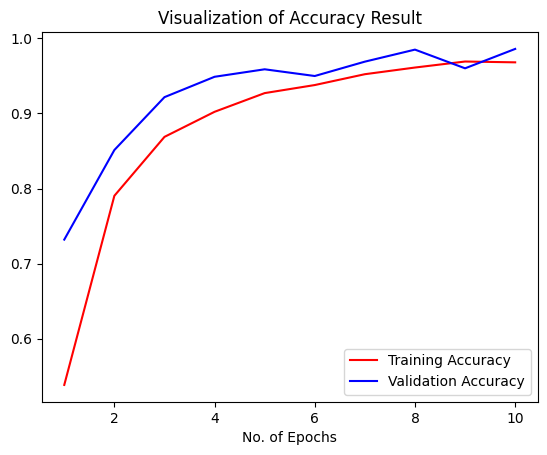

In [52]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [53]:
class_name = validation_set.class_names

In [55]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid_with_samples',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18345 files belonging to 10 classes.


In [56]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

18345/18345 ━━━━━━━━━━━━━━━━━━━━ 208s 11ms/step


In [57]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [58]:
Y_true

<tf.Tensor: shape=(18345,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [59]:
predicted_categories

<tf.Tensor: shape=(18345,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [61]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.98      0.99      0.99      1702
                        Tomato___Early_blight       0.98      0.99      0.98      1920
                         Tomato___Late_blight       0.98      0.98      0.98      1851
                           Tomato___Leaf_Mold       0.99      1.00      0.99      1882
                  Tomato___Septoria_leaf_spot       0.99      0.97      0.98      1745
Tomato___Spider_mites Two-spotted_spider_mite       0.98      0.99      0.98      1741
                         Tomato___Target_Spot       0.98      0.98      0.98      1827
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99      1961
                 Tomato___Tomato_mosaic_virus       0.99      1.00      0.99      1790
                             Tomato___healthy       1.00      0.98      0.99      1926

                                     accu

### Confusion Matrix Visualization

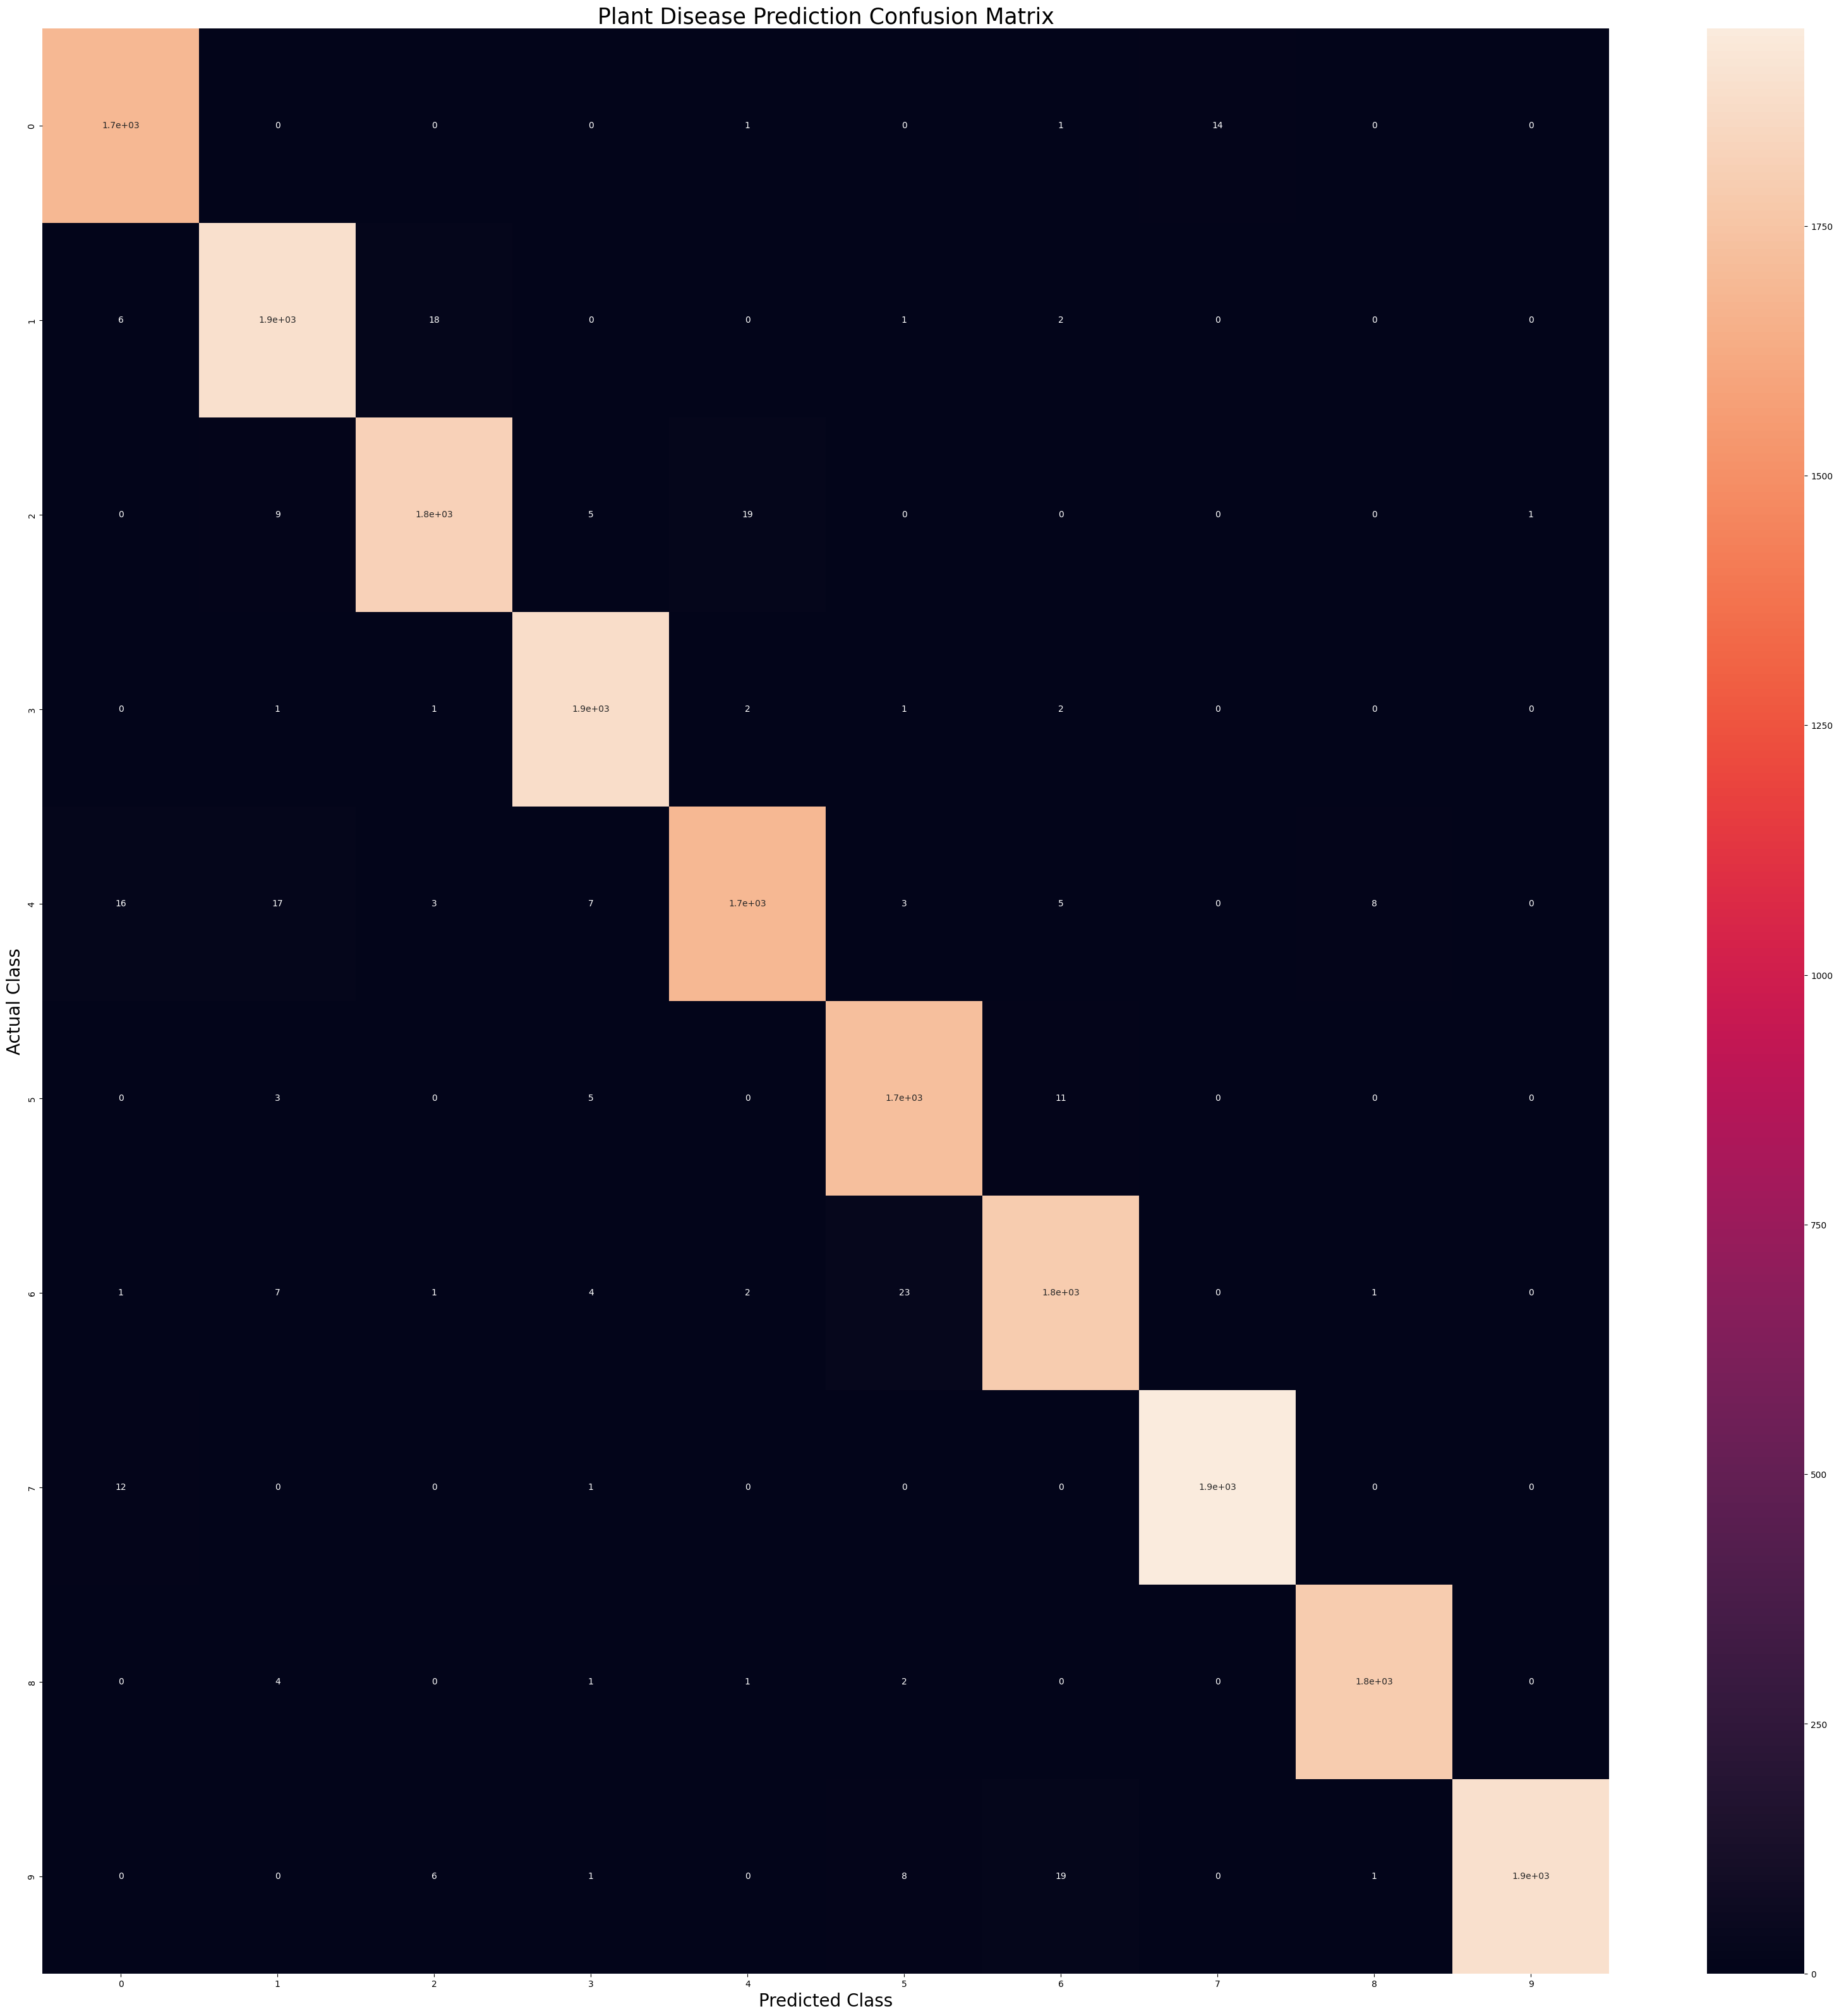

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)

# Save the output as an image
plt.savefig('confusion_matrix.png')

plt.show()


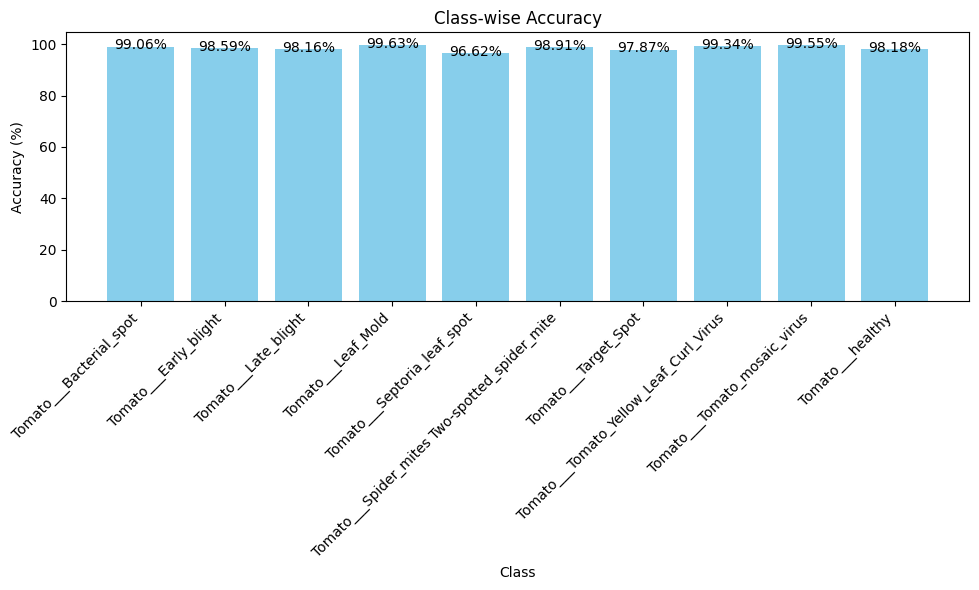

In [65]:
import matplotlib.pyplot as plt

# Assuming cm is the confusion matrix
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Plotting the class-wise accuracy with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(class_name, class_accuracy * 100, color='skyblue')
plt.title('Class-wise Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')

# Adding annotations with offset
for bar, acc in zip(bars, class_accuracy * 100):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.5, 
             f'{acc:.2f}%', 
             ha='center', 
             va='center',  # Adjusted vertical alignment
             color='black',  # Set text color to black
             fontsize=10)  # Adjust text font size

plt.tight_layout()
plt.show()


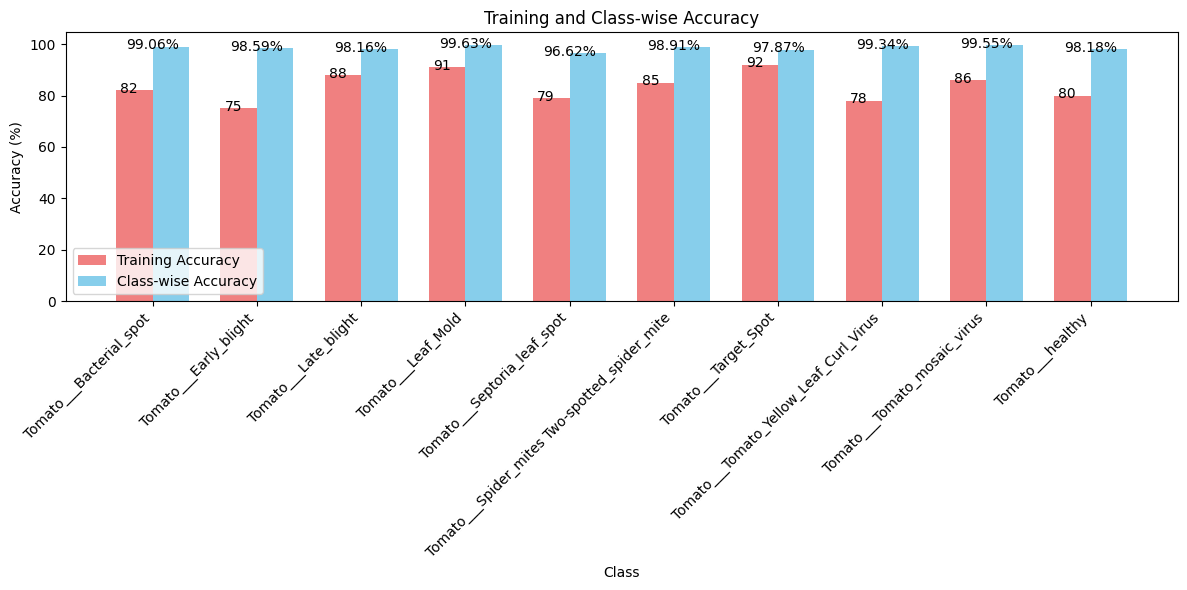

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming cm is the confusion matrix
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Sample training accuracy values (multiplied by 100)
# Replace these with your actual training accuracy values
training_accuracy = [82, 75, 88, 91, 79, 85, 92, 78, 86, 80]

# Plotting the class-wise accuracy and training accuracy with annotations
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(class_name))

# Plotting training accuracy
plt.bar(index, training_accuracy, bar_width, label='Training Accuracy', color='lightcoral')

# Plotting class-wise accuracy
plt.bar(index + bar_width, class_accuracy * 100, bar_width, label='Class-wise Accuracy', color='skyblue')

plt.title('Training and Class-wise Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.xticks(index + bar_width / 2, class_name, rotation=45, ha='right')

# Adding annotations for class-wise accuracy
for i, acc in enumerate(class_accuracy * 100):
    plt.text(index[i] + bar_width / 2, 
             acc + 0.5, 
             f'{acc:.2f}%', 
             ha='center', 
             va='center',  
             color='black',  
             fontsize=10)

# Adding annotations for training accuracy
for i, acc in enumerate(training_accuracy):
    plt.text(index[i] - 0.05, 
             acc + 0.5, 
             f'{acc}', 
             ha='center', 
             va='center',  
             color='black',  
             fontsize=10)

plt.legend(loc='lower left')  # Move legend to the bottom left corner
plt.tight_layout()
plt.show()


In [74]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Add a convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)